In [8]:
import scipy.io
import os
import urllib.request
import zipfile
from PIL import Image  as Imageplt
import matplotlib.pyplot as plt
from IPython.display import Image, display
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img

In [9]:
#由圖片的作者提供的matlab碼修改
import matplotlib.patches as mpatches
import matplotlib.cm as cm
def show_pixel_anno(original, original_lab, label): #顯示變形後的原圖、原標籤圖、預測標籤圖、預測有的標籤
    #接受(128,128,1)的np資料
    # Load label list
    label_list = scipy.io.loadmat('./label_list.mat') #獲取作者提供的標籤列表
    L_list =label_list['label_list'][0].tolist() 
    label_list = [item.item() for item in L_list]
    #label_list = scipy.io.loadmat("./label_list.mat")["label_list"]
    #label_list = label_list[0]
    #print(label_list)
    #print(len(label_list))
    
    # Load MAT file
    groundtruth = label
    original_groundtruth = original_lab

    # Load image
    im = original
    
    colors = cm.get_cmap('jet', len(label_list)) #給標籤配色
    f = plt.figure(figsize=(10,10)) #畫布

    # 1. show original photo
    plt.subplot(1, 4, 1)
    plt.imshow(im)
    plt.axis('off')
    plt.title('Original')
    
    # 2. 顯示原本的annotation
    cur_labels = np.unique(original_groundtruth) #不同的數字
    label_names = [label_list[cur_label] for cur_label in cur_labels] #不同的數字對應的標籤
    gt_image = np.zeros((original_groundtruth.shape[0], original_groundtruth.shape[1], 3))
    for labelidx in range(len(cur_labels)):
        indices = np.where(original_groundtruth == cur_labels[labelidx])
        rows = indices[0]
        cols = indices[1]
        curcolor = colors(cur_labels[labelidx])
        for i in range(len(rows)):
            gt_image[rows[i], cols[i], 0] = curcolor[0]
            gt_image[rows[i], cols[i], 1] = curcolor[1]
            gt_image[rows[i], cols[i], 2] = curcolor[2]

    plt.subplot(1, 4, 2)
    plt.axis('off')
    plt.imshow(gt_image)
    plt.title('Ground Truth')

    # 3. 顯示預測的annotation
    cur_labels = np.unique(groundtruth)
    label_names = [label_list[cur_label] for cur_label in cur_labels]
    gt_image = np.zeros((groundtruth.shape[0], groundtruth.shape[1], 3))
    for labelidx in range(len(cur_labels)):
        indices = np.where(groundtruth == cur_labels[labelidx])
        rows = indices[0]
        cols = indices[1]
        curcolor = colors(cur_labels[labelidx])
        for i in range(len(rows)):
            gt_image[rows[i], cols[i], 0] = curcolor[0]
            gt_image[rows[i], cols[i], 1] = curcolor[1]
            gt_image[rows[i], cols[i], 2] = curcolor[2]

    plt.subplot(1, 4, 3)
    plt.axis('off')
    plt.imshow(gt_image)
    plt.title('Ground Truth')
    
    # 4. visualize legend
    legend_patches = []
    plt.subplot(1, 4, 4)
    plt.axis('off')
    for i in range(len(cur_labels)):
        color_patch = mpatches.Patch(color=colors(cur_labels[i]), label=label_names[i])
        legend_patches.append(color_patch)
    plt.gca().invert_yaxis()
    plt.legend(label_names,handles=legend_patches, loc='right')
    plt.show()

In [10]:
# 檢查資料集是否已下載和解壓縮
dataset_dir = "dataset/clothing-co-parsing-master/photos"
if not os.path.exists(dataset_dir):
    # 下載資料集
    url = "https://github.com/bearpaw/clothing-co-parsing/archive/master.zip"
    save_path = "dataset.zip"
    urllib.request.urlretrieve(url, save_path)
    
    # 解壓縮資料集
    with zipfile.ZipFile(save_path, 'r') as zip_ref:
        zip_ref.extractall("dataset")
        
# 獲取所有原圖位置
path_to_image_dataset = []
root_dir = "dataset/clothing-co-parsing-master/photos"
for root, dirs, files in os.walk(root_dir):
    for file in files:
        file_path = os.path.join(root, file)
        path_to_image_dataset.append(file_path)

print(len(path_to_image_dataset))
# 印所有原圖位置
for file_path in path_to_image_dataset:
    print(file_path)

2098
dataset/clothing-co-parsing-master/photos\0001.jpg
dataset/clothing-co-parsing-master/photos\0002.jpg
dataset/clothing-co-parsing-master/photos\0003.jpg
dataset/clothing-co-parsing-master/photos\0004.jpg
dataset/clothing-co-parsing-master/photos\0005.jpg
dataset/clothing-co-parsing-master/photos\0006.jpg
dataset/clothing-co-parsing-master/photos\0007.jpg
dataset/clothing-co-parsing-master/photos\0008.jpg
dataset/clothing-co-parsing-master/photos\0009.jpg
dataset/clothing-co-parsing-master/photos\0010.jpg
dataset/clothing-co-parsing-master/photos\0011.jpg
dataset/clothing-co-parsing-master/photos\0012.jpg
dataset/clothing-co-parsing-master/photos\0013.jpg
dataset/clothing-co-parsing-master/photos\0014.jpg
dataset/clothing-co-parsing-master/photos\0015.jpg
dataset/clothing-co-parsing-master/photos\0016.jpg
dataset/clothing-co-parsing-master/photos\0017.jpg
dataset/clothing-co-parsing-master/photos\0018.jpg
dataset/clothing-co-parsing-master/photos\0019.jpg
dataset/clothing-co-parsin

In [11]:
# 獲取所有標籤位置
path_to_image_labdataset = []
root_dir = "dataset/clothing-co-parsing-master/annotations/pixel-level"
for root, dirs, files in os.walk(root_dir):
    for file in files:
        file_path = os.path.join(root, file)
        path_to_image_labdataset.append(file_path)

print(len(path_to_image_labdataset))
# 印所有標籤位置
for file_path in path_to_image_labdataset:
    print(file_path)

1004
dataset/clothing-co-parsing-master/annotations/pixel-level\0001.mat
dataset/clothing-co-parsing-master/annotations/pixel-level\0002.mat
dataset/clothing-co-parsing-master/annotations/pixel-level\0003.mat
dataset/clothing-co-parsing-master/annotations/pixel-level\0004.mat
dataset/clothing-co-parsing-master/annotations/pixel-level\0005.mat
dataset/clothing-co-parsing-master/annotations/pixel-level\0006.mat
dataset/clothing-co-parsing-master/annotations/pixel-level\0007.mat
dataset/clothing-co-parsing-master/annotations/pixel-level\0008.mat
dataset/clothing-co-parsing-master/annotations/pixel-level\0009.mat
dataset/clothing-co-parsing-master/annotations/pixel-level\0010.mat
dataset/clothing-co-parsing-master/annotations/pixel-level\0011.mat
dataset/clothing-co-parsing-master/annotations/pixel-level\0012.mat
dataset/clothing-co-parsing-master/annotations/pixel-level\0013.mat
dataset/clothing-co-parsing-master/annotations/pixel-level\0014.mat
dataset/clothing-co-parsing-master/annotati

In [12]:
#分訓練、測試資料集
np.random.seed(9999)
idx = np.random.permutation(1000) #創建0~999的整數數組且為隨機順序
training_idx = idx[:750]
testing_idx  = idx[750:]

path_to_image_traindataset = []
path_to_image_trainlabdataset = []
path_to_image_testdataset = []
path_to_image_testlabdataset = []

path_to_image_traindataset = [path_to_image_dataset[i] for i in training_idx]
path_to_image_testdataset = [path_to_image_dataset[i] for i in testing_idx]
path_to_image_trainlabdataset = [path_to_image_labdataset[i] for i in training_idx]
path_to_image_testlabdataset = [path_to_image_labdataset[i] for i in testing_idx]

print(len(path_to_image_traindataset))
print(len(path_to_image_trainlabdataset))
print(len(path_to_image_testdataset))
print(len(path_to_image_testlabdataset))
# 只挑測試10組印出
for a, b in zip(path_to_image_testdataset[:10], path_to_image_testlabdataset[:10]):
    print(a, "|", b)

750
750
250
250
dataset/clothing-co-parsing-master/photos\0604.jpg | dataset/clothing-co-parsing-master/annotations/pixel-level\0604.mat
dataset/clothing-co-parsing-master/photos\0471.jpg | dataset/clothing-co-parsing-master/annotations/pixel-level\0471.mat
dataset/clothing-co-parsing-master/photos\0236.jpg | dataset/clothing-co-parsing-master/annotations/pixel-level\0236.mat
dataset/clothing-co-parsing-master/photos\0521.jpg | dataset/clothing-co-parsing-master/annotations/pixel-level\0521.mat
dataset/clothing-co-parsing-master/photos\0421.jpg | dataset/clothing-co-parsing-master/annotations/pixel-level\0421.mat
dataset/clothing-co-parsing-master/photos\0796.jpg | dataset/clothing-co-parsing-master/annotations/pixel-level\0796.mat
dataset/clothing-co-parsing-master/photos\0148.jpg | dataset/clothing-co-parsing-master/annotations/pixel-level\0148.mat
dataset/clothing-co-parsing-master/photos\0336.jpg | dataset/clothing-co-parsing-master/annotations/pixel-level\0336.mat
dataset/clothing

In [13]:
# 超參數
img_size = (128, 128)
num_classes = 59
batch_size = 16

In [14]:
class imgs_deal(keras.utils.Sequence): #做資料前處理(load、分小批次)

    def __init__(self, batch_size, img_size, input_img_paths, targetlab_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.targetlab_img_paths = targetlab_img_paths

    def __len__(self):
        return len(self.targetlab_img_paths) // self.batch_size

    def __getitem__(self, idx): 
        low = idx * self.batch_size
        high = min(low + self.batch_size, len(self.input_img_paths))
        batch_input_img_paths = self.input_img_paths[low : high]
        batch_targetlab_img_paths = self.targetlab_img_paths[low : high]
        
        x = np.zeros((batch_size,) + self.img_size + (3,), dtype="float32") 
        for j, path in enumerate(batch_input_img_paths):
            img = load_img(path, target_size=self.img_size, interpolation="bilinear") 
            #img = np.array(img).astype("float32")
            x[j] = img# / 255
            
        y = np.zeros((batch_size,) + self.img_size + (num_classes,), dtype="uint8")
        for j, path in enumerate(batch_targetlab_img_paths):
            mat = scipy.io.loadmat(path)
            pixel_data = mat['groundtruth']
            image = Imageplt.fromarray(pixel_data) #轉換為PIL圖像
            image = image.resize(img_size, resample=Imageplt.NEAREST) #標籤圖像要用最近臨的內插法進行縮放
            imagenp = np.array(image) #轉換為NumPy數組
            imagenp = np.eye(59)[imagenp] #對一通道做onehot成59通道
            #imagenp = imagenp.astype(np.float32)
            y[j]=imagenp
        #plt.imshow(x[0])
        #plt.show()
        #plt.imshow(y[0], cmap='gray')
        #plt.show()
        return x, y

In [15]:
#將資料做前處理

train_gen = imgs_deal(
    batch_size, img_size, path_to_image_traindataset, path_to_image_trainlabdataset
)

#train_gen.__getitem__(0)

In [16]:
def upsample(filters, size): #上採樣
    return [tf.keras.layers.Conv2DTranspose(filters, size, strides=2,padding='same'), #會使圖向大小翻倍增加
            tf.keras.layers.Conv2D(filters, size ,padding='same'),
            tf.keras.layers.Conv2D(filters, size ,padding='same'),
            tf.keras.layers.BatchNormalization(), #正則化:有助於緩解梯度消失和梯度爆炸問題
            tf.keras.layers.ReLU()]

In [17]:
def def_unet(classes,height,width,channels,base_model,layer_names,name):
    base_model = tf.keras.Model(inputs=base_model.input,outputs = [base_model.output]+
                                                        [base_model.get_layer(na).output for na in reversed(layer_names)])
    base_model.summary() #show出所有DenseNet121有的層
    inputs = tf.keras.layers.Input(shape=(height,width,channels))
    skips  = base_model(inputs)
    x      = skips[0]
    
    # U型的底部處理
    x      = tf.keras.layers.Conv2D(1024,(3,3),padding='same',activation='relu')(x)
    for layer in upsample(1024,(3,3)):
        x=layer(x)        
    #upsampling network
    for ch,skip in zip([512,256,64],skips[1:-1]): #這裡的參數是根據所選的DenseNet-layer而來
        x = tf.keras.layers.Concatenate()([x, skip])#此處的Concatenate是用作unet架構中，橫跨的那條線
        for layer in upsample(ch,(3,3)):
            x=layer(x)
            
    x = tf.keras.layers.Concatenate()([x,skips[-1]])
    for layer in upsample(128,(3,3)):
        x=layer(x)
    x = tf.keras.layers.Conv2D(96,(1,1),padding='same')(x)        
    #最後輸出        
    x = tf.keras.layers.Conv2D(classes,(3,3),padding='same',activation='softmax')(x)        
    
    unet = tf.keras.Model(inputs=inputs,outputs=x,name=name)
    unet.summary()
    base_model.trainable = True #要重新訓練DenseNet121
    unet.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer='adam'
                ,metrics=[tf.keras.metrics.MeanIoU(num_classes=59)])
    #由於是要對多通道進行訓練，因此loss用CategoricalCrossentropy
    #iou是評估圖像結果的一種方法，會計算有多少區塊是分類準確的
    return unet

DenseNet121_layer_names = [#設定要用的層
    'conv1/relu',
    'conv2_block6_concat', 
    'conv3_block12_concat',
    'conv4_block24_concat',
]

#使用DenseNet121當unet下採樣部分
unet_densenet = def_unet(num_classes,128,128,3,tf.keras.applications.DenseNet121(include_top = False),\
                         DenseNet121_layer_names,'unet-vgg16')  

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d[0][0]']         
                                64)                                                           

                                                                                                  
 conv2_block3_concat (Concatena  (None, None, None,   0          ['conv2_block2_concat[0][0]',    
 te)                            160)                              'conv2_block3_2_conv[0][0]']    
                                                                                                  
 conv2_block4_0_bn (BatchNormal  (None, None, None,   640        ['conv2_block3_concat[0][0]']    
 ization)                       160)                                                              
                                                                                                  
 conv2_block4_0_relu (Activatio  (None, None, None,   0          ['conv2_block4_0_bn[0][0]']      
 n)                             160)                                                              
                                                                                                  
 conv2_blo

 n)                             128)                                                              
                                                                                                  
 conv3_block1_1_conv (Conv2D)   (None, None, None,   16384       ['conv3_block1_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block1_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block1_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block1_1_relu (Activatio  (None, None, None,   0          ['conv3_block1_1_bn[0][0]']      
 n)                             128)                                                              
          

 conv3_block5_0_relu (Activatio  (None, None, None,   0          ['conv3_block5_0_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv3_block5_1_conv (Conv2D)   (None, None, None,   32768       ['conv3_block5_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block5_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block5_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block5_1_relu (Activatio  (None, None, None,   0          ['conv3_block5_1_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block9_0_relu (Activatio  (None, None, None,   0          ['conv3_block9_0_bn[0][0]']      
 n)                             384)                                                              
                                                                                                  
 conv3_block9_1_conv (Conv2D)   (None, None, None,   49152       ['conv3_block9_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block9_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block9_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_blo

                                512)                                                              
                                                                                                  
 pool3_relu (Activation)        (None, None, None,   0           ['pool3_bn[0][0]']               
                                512)                                                              
                                                                                                  
 pool3_conv (Conv2D)            (None, None, None,   131072      ['pool3_relu[0][0]']             
                                256)                                                              
                                                                                                  
 pool3_pool (AveragePooling2D)  (None, None, None,   0           ['pool3_conv[0][0]']             
                                256)                                                              
          

 conv4_block4_1_bn (BatchNormal  (None, None, None,   512        ['conv4_block4_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv4_block4_1_relu (Activatio  (None, None, None,   0          ['conv4_block4_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv4_block4_2_conv (Conv2D)   (None, None, None,   36864       ['conv4_block4_1_relu[0][0]']    
                                32)                                                               
                                                                                                  
 conv4_block4_concat (Concatena  (None, None, None,   0          ['conv4_block3_concat[0][0]',    
 te)      

                                                                                                  
 conv4_block8_1_bn (BatchNormal  (None, None, None,   512        ['conv4_block8_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv4_block8_1_relu (Activatio  (None, None, None,   0          ['conv4_block8_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv4_block8_2_conv (Conv2D)   (None, None, None,   36864       ['conv4_block8_1_relu[0][0]']    
                                32)                                                               
                                                                                                  
 conv4_blo

                                128)                                                              
                                                                                                  
 conv4_block12_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block12_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block12_1_relu (Activati  (None, None, None,   0          ['conv4_block12_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv4_block12_2_conv (Conv2D)  (None, None, None,   36864       ['conv4_block12_1_relu[0][0]']   
                                32)                                                               
          

 conv4_block16_1_conv (Conv2D)  (None, None, None,   94208       ['conv4_block16_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block16_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block16_1_relu (Activati  (None, None, None,   0          ['conv4_block16_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv4_block16_2_conv (Conv2D)  (None, None, None,   36864       ['conv4_block16_1_relu[0][0]']   
          

                                                                                                  
 conv4_block20_1_conv (Conv2D)  (None, None, None,   110592      ['conv4_block20_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block20_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block20_1_relu (Activati  (None, None, None,   0          ['conv4_block20_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv4_blo

 on)                            992)                                                              
                                                                                                  
 conv4_block24_1_conv (Conv2D)  (None, None, None,   126976      ['conv4_block24_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block24_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block24_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block24_1_relu (Activati  (None, None, None,   0          ['conv4_block24_1_bn[0][0]']     
 on)                            128)                                                              
          

 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   36864       ['conv5_block3_1_relu[0][0]']    
                                32)                                                               
                                                                                                  
 conv5_block3_concat (Concatena  (None, None, None,   0          ['conv5_block2_concat[0][0]',    
 te)                            608)                              'conv5_block3_2_conv[0][0]']    
                                                                                                  
 conv5_block4_0_bn (BatchNormal  (None, None, None,   2432       ['conv5_block3_concat[0][0]']    
 ization) 

                                                                                                  
 conv5_block7_1_relu (Activatio  (None, None, None,   0          ['conv5_block7_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv5_block7_2_conv (Conv2D)   (None, None, None,   36864       ['conv5_block7_1_relu[0][0]']    
                                32)                                                               
                                                                                                  
 conv5_block7_concat (Concatena  (None, None, None,   0          ['conv5_block6_concat[0][0]',    
 te)                            736)                              'conv5_block7_2_conv[0][0]']    
                                                                                                  
 conv5_blo

 lization)                      128)                                                              
                                                                                                  
 conv5_block11_1_relu (Activati  (None, None, None,   0          ['conv5_block11_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv5_block11_2_conv (Conv2D)  (None, None, None,   36864       ['conv5_block11_1_relu[0][0]']   
                                32)                                                               
                                                                                                  
 conv5_block11_concat (Concaten  (None, None, None,   0          ['conv5_block10_concat[0][0]',   
 ate)                           864)                              'conv5_block11_2_conv[0][0]']   
          

 conv5_block15_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block15_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv5_block15_1_relu (Activati  (None, None, None,   0          ['conv5_block15_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv5_block15_2_conv (Conv2D)  (None, None, None,   36864       ['conv5_block15_1_relu[0][0]']   
                                32)                                                               
                                                                                                  
 conv5_block15_concat (Concaten  (None, None, None,   0          ['conv5_block14_concat[0][0]',   
 ate)     

 batch_normalization_1 (BatchNo  (None, 16, 16, 512)  2048       ['conv2d_4[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 re_lu_1 (ReLU)                 (None, 16, 16, 512)  0           ['batch_normalization_1[0][0]']  
                                                                                                  
 concatenate_1 (Concatenate)    (None, 16, 16, 1024  0           ['re_lu_1[0][0]',                
                                )                                 'model[0][2]']                  
                                                                                                  
 conv2d_transpose_2 (Conv2DTran  (None, 32, 32, 256)  2359552    ['concatenate_1[0][0]']          
 spose)                                                                                           
          

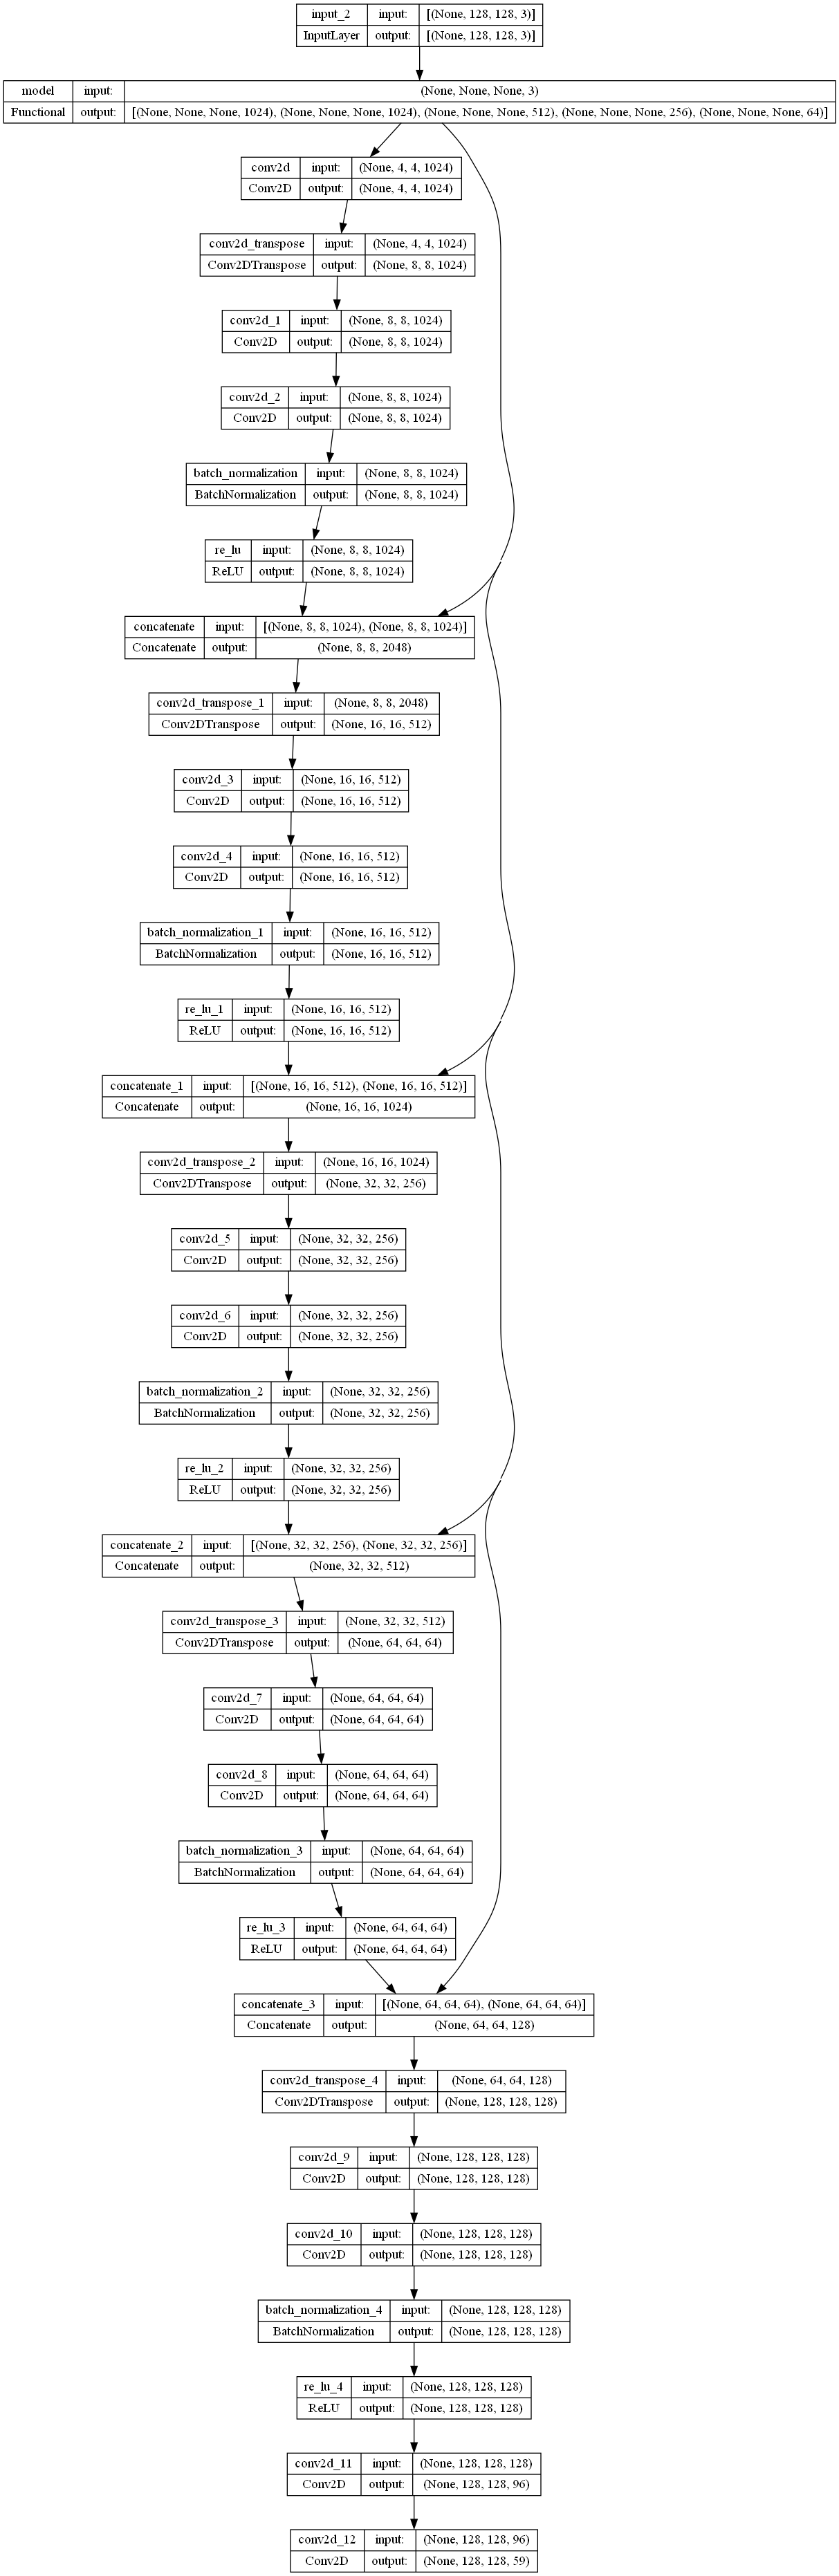

In [18]:
tf.keras.utils.plot_model(unet_densenet, show_shapes=True) #印出有圖架構

In [12]:
#訓練模型
#設定檢查點 callbacks，模型存檔
#會存有最佳loss值的模型權重
callbacks = [
    keras.callbacks.ModelCheckpoint("hw4-8.h5",monitor='loss', save_best_only=True)
]

epochs = 20
unet_densenet_history = unet_densenet.fit(train_gen, epochs=epochs, callbacks=callbacks)

Epoch 1/20
46/46 [==============================] - 46s 492ms/step - loss: 1.0548 - mean_io_u: 0.4916
Epoch 2/20
46/46 [==============================] - 21s 454ms/step - loss: 0.6825 - mean_io_u: 0.4929
Epoch 3/20
46/46 [==============================] - 20s 419ms/step - loss: 0.6070 - mean_io_u: 0.4915
Epoch 4/20
46/46 [==============================] - 19s 417ms/step - loss: 0.5704 - mean_io_u: 0.4918
Epoch 5/20
46/46 [==============================] - 20s 418ms/step - loss: 0.5276 - mean_io_u: 0.4921
Epoch 6/20
46/46 [==============================] - 20s 417ms/step - loss: 0.5070 - mean_io_u: 0.4917
Epoch 7/20
46/46 [==============================] - 20s 419ms/step - loss: 0.4823 - mean_io_u: 0.4922
Epoch 8/20
46/46 [==============================] - 20s 417ms/step - loss: 0.4567 - mean_io_u: 0.4921
Epoch 9/20
46/46 [==============================] - 20s 418ms/step - loss: 0.4415 - mean_io_u: 0.4937
Epoch 10/20
46/46 [==============================] - 20s 417ms/step - loss: 0.4190

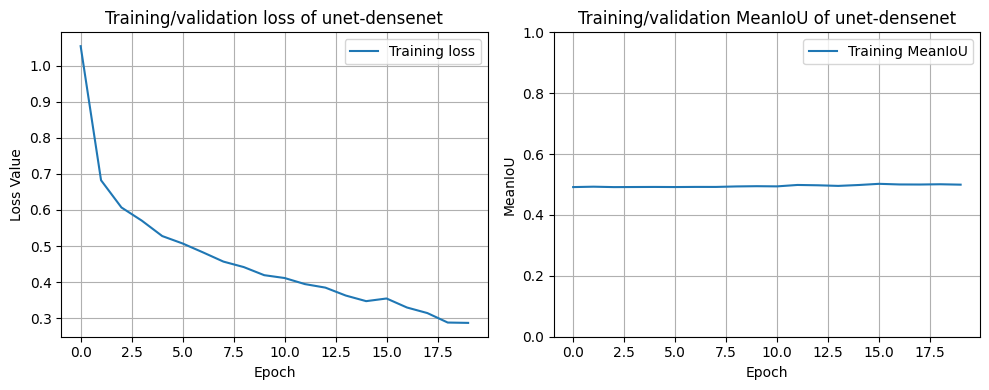

In [13]:
def plot_history(history, name):
    
    epochs = range(len(history['loss']))

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, history['loss'], label='Training loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss Value')
    plt.grid(True)
    plt.legend()
    plt.title('Training/validation loss of {}'.format(name))

    plt.subplot(1,2,2)
    plt.plot(epochs, history['mean_io_u'], label='Training MeanIoU')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('MeanIoU')
    plt.ylim([0, 1])
    plt.legend()
    plt.title('Training/validation MeanIoU of {}'.format(name))
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    return

plot_history(unet_densenet_history.history, 'unet-densenet')

In [14]:
epochs = 30
unet_densenet_history = unet_densenet.fit(train_gen, epochs=epochs, callbacks=callbacks)

Epoch 1/30
46/46 [==============================] - 17s 368ms/step - loss: 0.2942 - mean_io_u: 0.5029
Epoch 2/30
46/46 [==============================] - 19s 419ms/step - loss: 0.2632 - mean_io_u: 0.5001
Epoch 3/30
46/46 [==============================] - 20s 418ms/step - loss: 0.2539 - mean_io_u: 0.5026
Epoch 4/30
46/46 [==============================] - 17s 368ms/step - loss: 0.2546 - mean_io_u: 0.5001
Epoch 5/30
46/46 [==============================] - 19s 417ms/step - loss: 0.2359 - mean_io_u: 0.5008
Epoch 6/30
46/46 [==============================] - 20s 418ms/step - loss: 0.2166 - mean_io_u: 0.5020
Epoch 7/30
46/46 [==============================] - 20s 422ms/step - loss: 0.1984 - mean_io_u: 0.5030
Epoch 8/30
46/46 [==============================] - 19s 417ms/step - loss: 0.1902 - mean_io_u: 0.5041
Epoch 9/30
46/46 [==============================] - 20s 418ms/step - loss: 0.1716 - mean_io_u: 0.5070
Epoch 10/30
46/46 [==============================] - 20s 417ms/step - loss: 0.1646

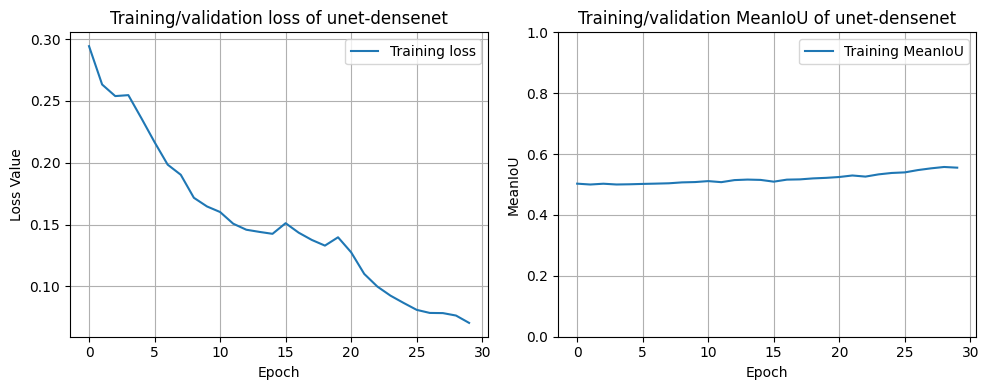

In [16]:
def plot_history(history, name):
    
    epochs = range(len(history['loss']))

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, history['loss'], label='Training loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss Value')
    plt.grid(True)
    plt.legend()
    plt.title('Training/validation loss of {}'.format(name))

    plt.subplot(1,2,2)
    plt.plot(epochs, history['mean_io_u'], label='Training MeanIoU')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('MeanIoU')
    plt.ylim([0, 1])
    plt.legend()
    plt.title('Training/validation MeanIoU of {}'.format(name))
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    return

plot_history(unet_densenet_history.history, 'unet-densenet')

In [17]:
epochs = 30
unet_densenet_history = unet_densenet.fit(train_gen, epochs=epochs, callbacks=callbacks)

Epoch 1/30
46/46 [==============================] - 23s 490ms/step - loss: 0.0686 - mean_io_u: 0.5630
Epoch 2/30
46/46 [==============================] - 22s 469ms/step - loss: 0.0671 - mean_io_u: 0.5648
Epoch 3/30
46/46 [==============================] - 20s 433ms/step - loss: 0.0688 - mean_io_u: 0.5648
Epoch 4/30
46/46 [==============================] - 21s 459ms/step - loss: 0.0706 - mean_io_u: 0.5686
Epoch 5/30
46/46 [==============================] - 22s 463ms/step - loss: 0.0707 - mean_io_u: 0.5730
Epoch 6/30
46/46 [==============================] - 20s 427ms/step - loss: 0.0702 - mean_io_u: 0.5778
Epoch 7/30
46/46 [==============================] - 19s 419ms/step - loss: 0.0729 - mean_io_u: 0.5811
Epoch 8/30
46/46 [==============================] - 18s 384ms/step - loss: 0.0916 - mean_io_u: 0.5677
Epoch 9/30
46/46 [==============================] - 18s 386ms/step - loss: 0.2256 - mean_io_u: 0.5584
Epoch 10/30
46/46 [==============================] - 18s 395ms/step - loss: 0.4208

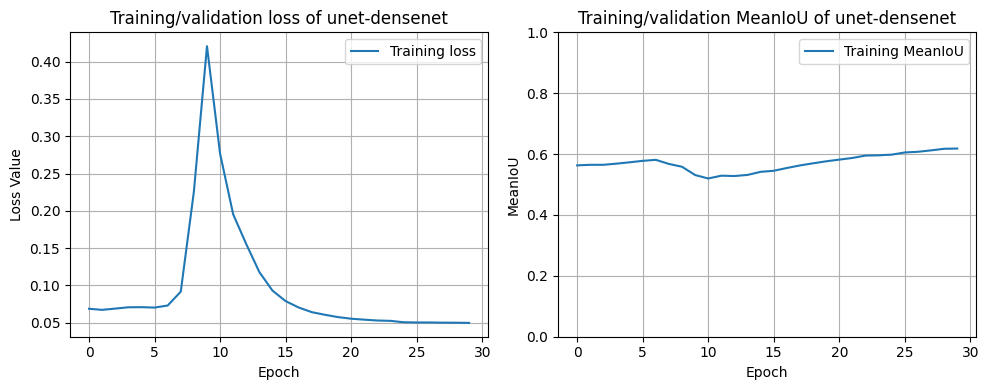

In [18]:
def plot_history(history, name):
    
    epochs = range(len(history['loss']))

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, history['loss'], label='Training loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss Value')
    plt.grid(True)
    plt.legend()
    plt.title('Training/validation loss of {}'.format(name))

    plt.subplot(1,2,2)
    plt.plot(epochs, history['mean_io_u'], label='Training MeanIoU')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('MeanIoU')
    plt.ylim([0, 1])
    plt.legend()
    plt.title('Training/validation MeanIoU of {}'.format(name))
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    return

plot_history(unet_densenet_history.history, 'unet-densenet')

In [19]:
epochs = 20
unet_densenet_history = unet_densenet.fit(train_gen, epochs=epochs, callbacks=callbacks)

Epoch 1/20
46/46 [==============================] - 23s 498ms/step - loss: 0.0486 - mean_io_u: 0.6253
Epoch 2/20
46/46 [==============================] - 23s 500ms/step - loss: 0.0486 - mean_io_u: 0.6267
Epoch 3/20
46/46 [==============================] - 22s 463ms/step - loss: 0.0490 - mean_io_u: 0.6350
Epoch 4/20
46/46 [==============================] - 23s 502ms/step - loss: 0.0482 - mean_io_u: 0.6288
Epoch 5/20
46/46 [==============================] - 23s 503ms/step - loss: 0.0469 - mean_io_u: 0.6297
Epoch 6/20
46/46 [==============================] - 24s 514ms/step - loss: 0.0458 - mean_io_u: 0.6332
Epoch 7/20
46/46 [==============================] - 20s 423ms/step - loss: 0.0448 - mean_io_u: 0.6364
Epoch 8/20
46/46 [==============================] - 22s 479ms/step - loss: 0.0435 - mean_io_u: 0.6410
Epoch 9/20
46/46 [==============================] - 21s 444ms/step - loss: 0.0437 - mean_io_u: 0.6382
Epoch 10/20
46/46 [==============================] - 19s 419ms/step - loss: 0.0437

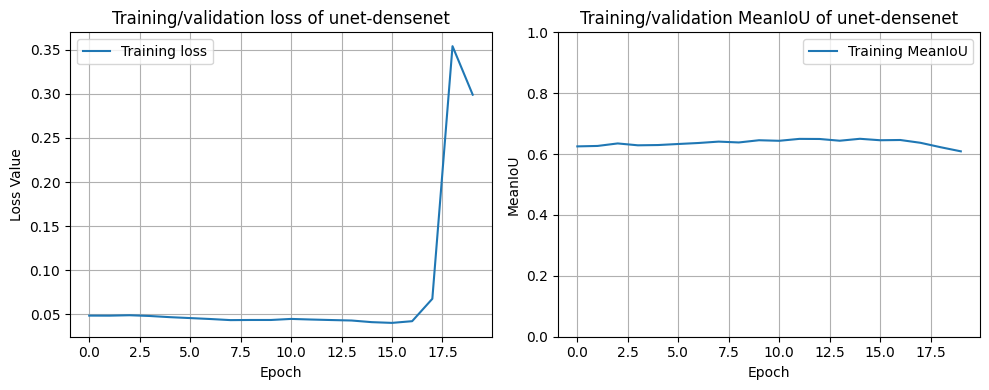

In [20]:
def plot_history(history, name):
    
    epochs = range(len(history['loss']))

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, history['loss'], label='Training loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss Value')
    plt.grid(True)
    plt.legend()
    plt.title('Training/validation loss of {}'.format(name))

    plt.subplot(1,2,2)
    plt.plot(epochs, history['mean_io_u'], label='Training MeanIoU')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('MeanIoU')
    plt.ylim([0, 1])
    plt.legend()
    plt.title('Training/validation MeanIoU of {}'.format(name))
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    return

plot_history(unet_densenet_history.history, 'unet-densenet')

In [21]:
epochs = 20
unet_densenet_history = unet_densenet.fit(train_gen, epochs=epochs, callbacks=callbacks)

Epoch 1/20
46/46 [==============================] - 20s 423ms/step - loss: 0.1963 - mean_io_u: 0.5871
Epoch 2/20
46/46 [==============================] - 19s 417ms/step - loss: 0.1469 - mean_io_u: 0.5852
Epoch 3/20
46/46 [==============================] - 20s 427ms/step - loss: 0.1062 - mean_io_u: 0.5840
Epoch 4/20
46/46 [==============================] - 19s 418ms/step - loss: 0.0811 - mean_io_u: 0.5906
Epoch 5/20
46/46 [==============================] - 20s 432ms/step - loss: 0.0684 - mean_io_u: 0.5969
Epoch 6/20
46/46 [==============================] - 20s 418ms/step - loss: 0.0544 - mean_io_u: 0.6062
Epoch 7/20
46/46 [==============================] - 20s 420ms/step - loss: 0.0466 - mean_io_u: 0.6126
Epoch 8/20
46/46 [==============================] - 19s 410ms/step - loss: 0.0428 - mean_io_u: 0.6163
Epoch 9/20
46/46 [==============================] - 19s 420ms/step - loss: 0.0405 - mean_io_u: 0.6268
Epoch 10/20
46/46 [==============================] - 22s 470ms/step - loss: 0.0390

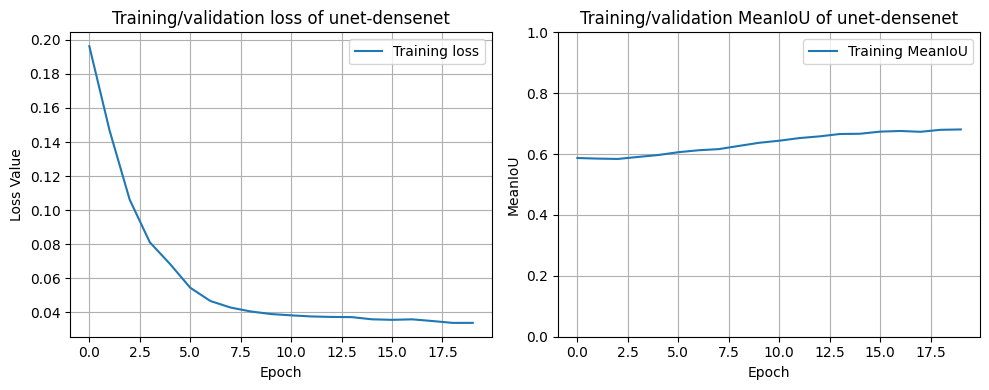

In [22]:
def plot_history(history, name):
    
    epochs = range(len(history['loss']))

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, history['loss'], label='Training loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss Value')
    plt.grid(True)
    plt.legend()
    plt.title('Training/validation loss of {}'.format(name))

    plt.subplot(1,2,2)
    plt.plot(epochs, history['mean_io_u'], label='Training MeanIoU')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('MeanIoU')
    plt.ylim([0, 1])
    plt.legend()
    plt.title('Training/validation MeanIoU of {}'.format(name))
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    return

plot_history(unet_densenet_history.history, 'unet-densenet')

In [19]:
from keras.models import load_model

# 加载模型
model = load_model("hw4-8.h5")

In [20]:
def display_mask(target): #將多通道的結果選最大，就是最有可能為那類->變成一通道
    mask = np.argmax(target, axis=-1)
    mask = np.expand_dims(mask, axis=-1)
    return mask

1/1 [==============================] - 6s 6s/step
結果


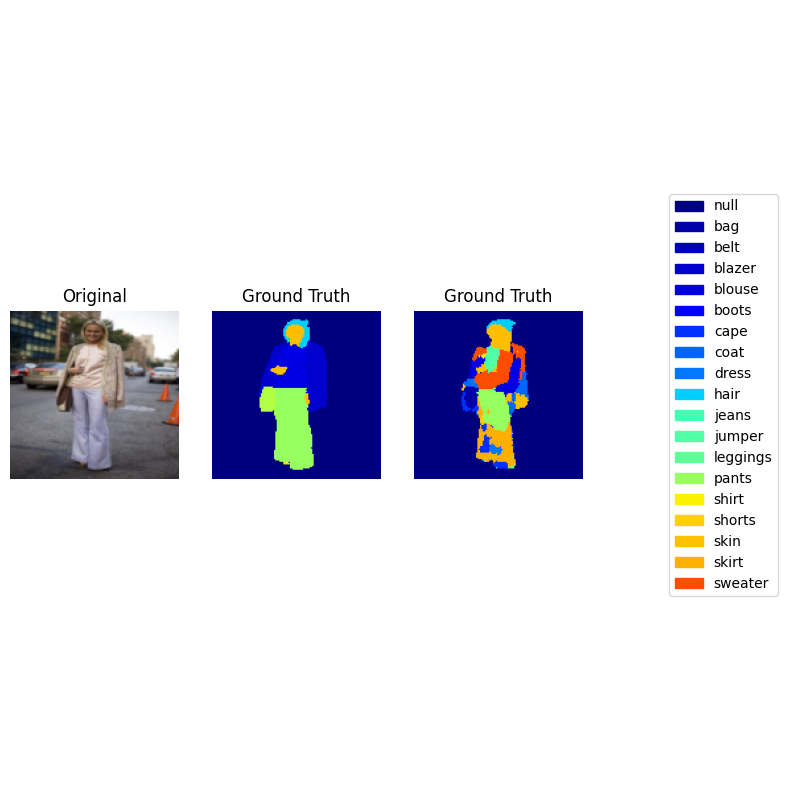

In [21]:
import PIL 
import warnings
warnings.filterwarnings("ignore")
#顯示結果

# 預測測試資料
img0 = load_img(path_to_image_testdataset[0], target_size=img_size, interpolation="bilinear")
test_preds = model.predict(np.expand_dims(img0.copy(), axis= 0))#predict要求有批次在最前面的維，由於只有一張圖因此用expand_dims
test_preds = test_preds.squeeze() #有多一維(批次大小)在前面，需要刪除

mat = scipy.io.loadmat(path_to_image_testlabdataset[0])
pixel_data = mat['groundtruth']
image = Imageplt.fromarray(pixel_data)
image = image.resize(img_size, resample=Imageplt.NEAREST)
imagenp = np.array(image)

# 顯示預測結果
print('結果')
show_pixel_anno(img0, imagenp, display_mask(test_preds))

1/1 [==============================] - 0s 24ms/step
結果


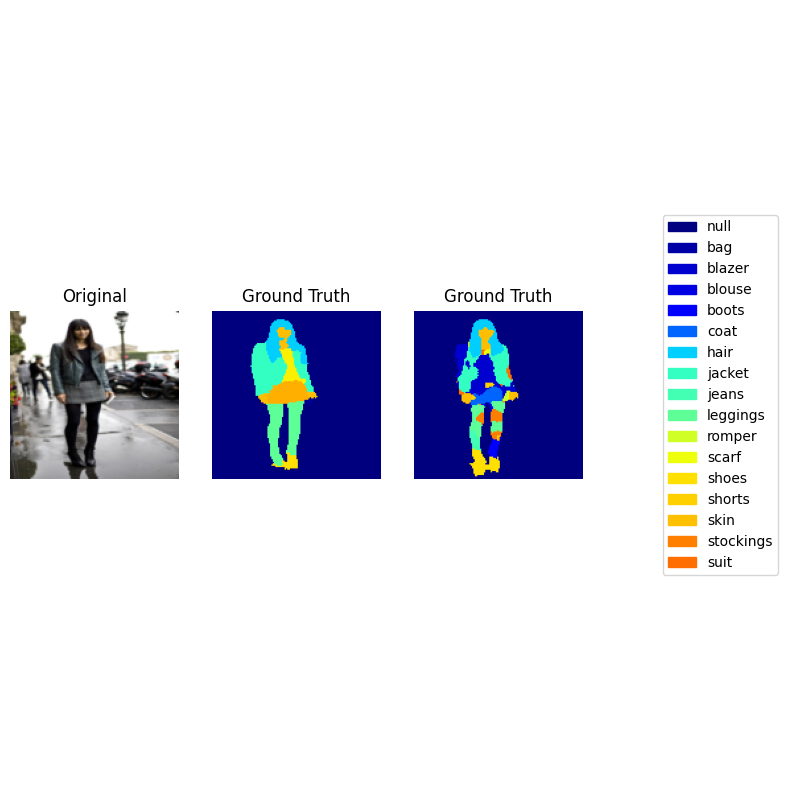

In [22]:
import PIL 
#顯示結果

# 預測測試資料
img0 = load_img(path_to_image_testdataset[1], target_size=img_size, interpolation="bilinear")
test_preds = model.predict(np.expand_dims(img0.copy(), axis= 0))#predict要求有批次在最前面的維，由於只有一張圖因此用expand_dims
test_preds = test_preds.squeeze() #有多一維(批次大小)在前面，需要刪除

mat = scipy.io.loadmat(path_to_image_testlabdataset[1])
pixel_data = mat['groundtruth']
image = Imageplt.fromarray(pixel_data)
image = image.resize(img_size, resample=Imageplt.NEAREST)
imagenp = np.array(image)

# 顯示預測結果
print('結果')
show_pixel_anno(img0, imagenp, display_mask(test_preds))

In [23]:
# 預測所有測試資料
ori_img = np.zeros((len(path_to_image_testdataset),) + img_size + (3,), dtype="uint8") 
ori_groundtrue = np.zeros((len(path_to_image_testdataset),) + img_size + (num_classes,), dtype="uint8")
pre_groundtrue = np.zeros((len(path_to_image_testdataset),) + img_size + (num_classes,), dtype="float32")

for i, (patha, pathb) in enumerate(zip(path_to_image_testdataset, path_to_image_testlabdataset)):
    img = load_img(patha, target_size=img_size, interpolation="bilinear")
    ori_img[i]=img
    
    test_preds = model.predict(np.expand_dims(img.copy(), axis= 0))
    test_preds = test_preds.squeeze()
    test_preds = display_mask(test_preds) #得出預測圖每像素應屬於哪類
    test_preds = test_preds.squeeze()
    test_preds = np.eye(59)[test_preds] #算iou需要onehot形式
    pre_groundtrue[i] = test_preds
    
    mat = scipy.io.loadmat(pathb)
    pixel_data = mat['groundtruth']
    image = Imageplt.fromarray(pixel_data)
    image = image.resize(img_size, resample=Imageplt.NEAREST)
    imagenp = np.array(image)
    ori_groundtrue[i] = np.eye(59)[imagenp]

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 26ms/step


Max IoU: 0.97403276


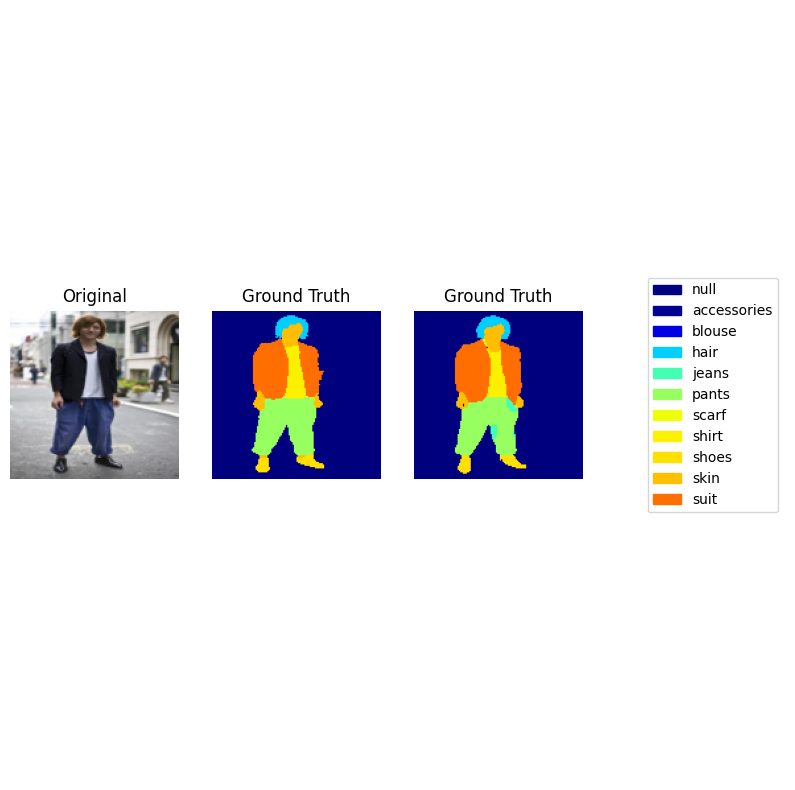

Min IoU: 0.76947856


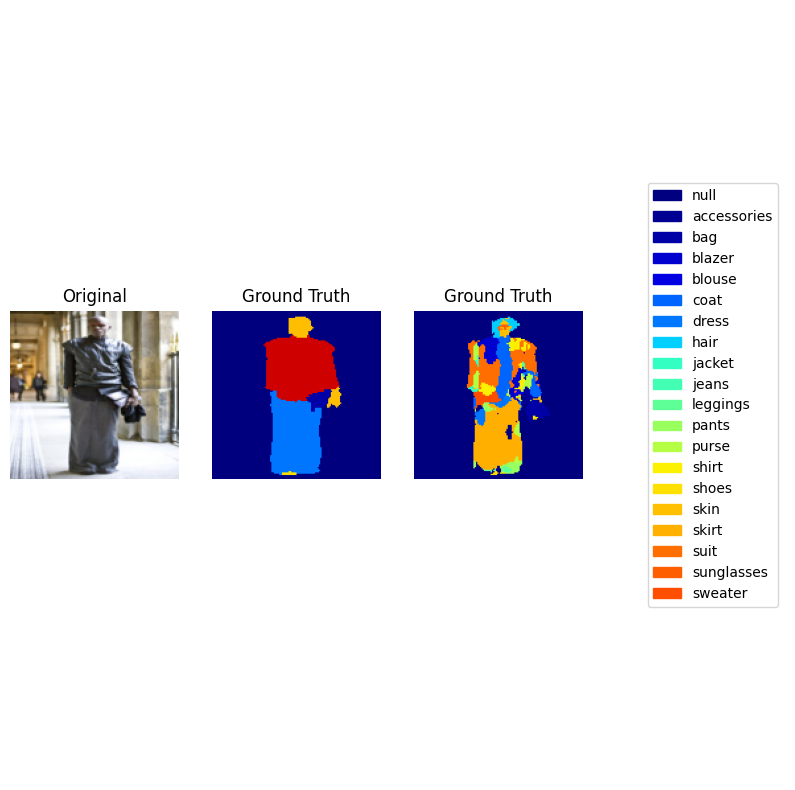

Average IoU: 0.87892675


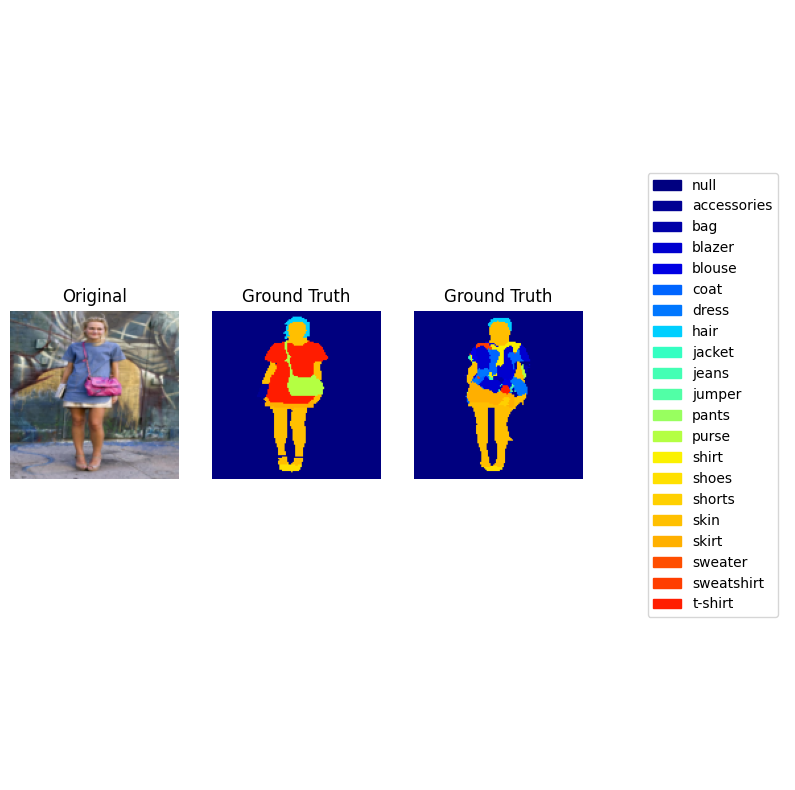

In [38]:
ious = []
mean_iou = tf.keras.metrics.MeanIoU(num_classes=num_classes)
for ori_label, pre_pred in zip(ori_groundtrue, pre_groundtrue):
    mean_iou.update_state(ori_label, pre_pred)
    iou = mean_iou.result().numpy()
    mean_iou.reset_states() #清除，以免累加
    ious.append(iou)
    
average_iou = np.mean(ious)
max_iou_idx = np.argmax(ious)
min_iou_idx = np.argmin(ious)
closest_iou_idx = np.abs(ious - average_iou).argmin() #最靠近average_iou的idx
print("Max IoU:", ious[max_iou_idx])
show_pixel_anno(ori_img[max_iou_idx], display_mask(ori_groundtrue[max_iou_idx]), display_mask(pre_groundtrue[max_iou_idx]))
print("Min IoU:", ious[min_iou_idx])
show_pixel_anno(ori_img[min_iou_idx], display_mask(ori_groundtrue[min_iou_idx]), display_mask(pre_groundtrue[min_iou_idx]))
print("Average IoU:", average_iou)
show_pixel_anno(ori_img[closest_iou_idx], display_mask(ori_groundtrue[closest_iou_idx]), \
                display_mask(pre_groundtrue[closest_iou_idx])) #取最接近平均

Max IoU: 0.9489680604294296


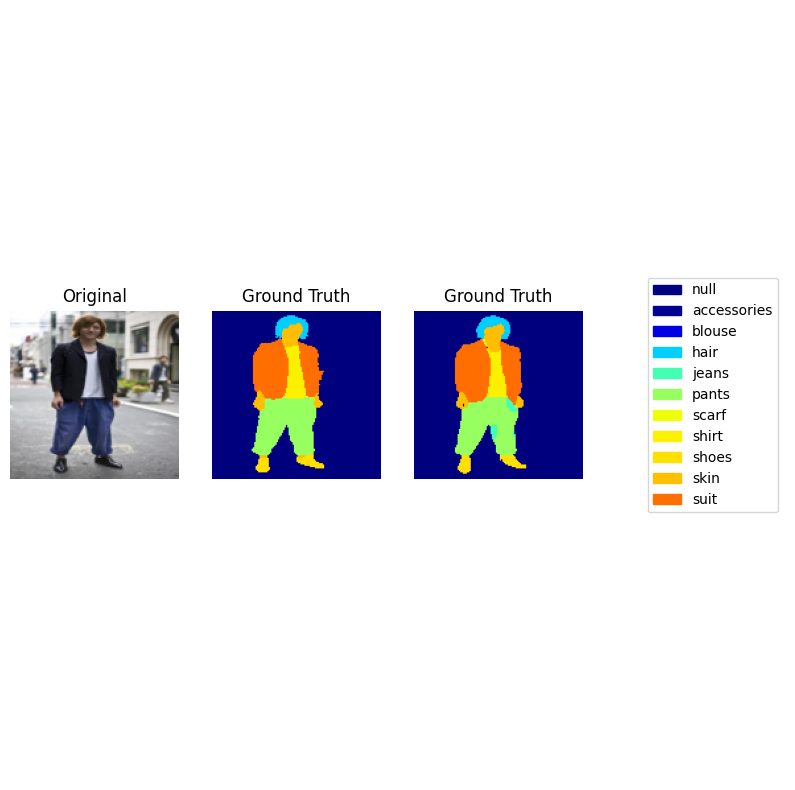

Min IoU: 0.5489482391869535


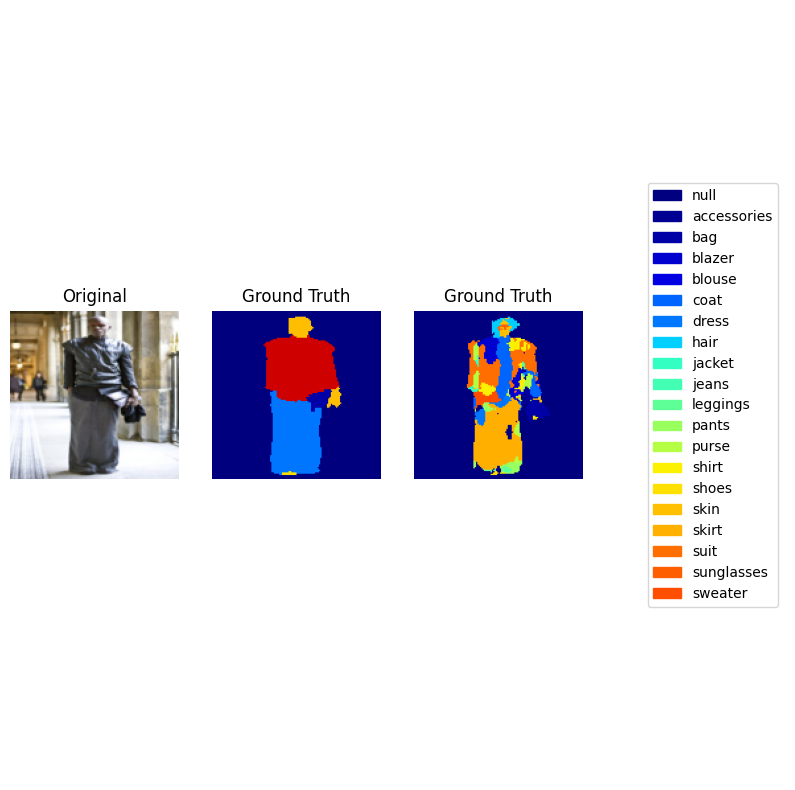

Average IoU: 0.762554761575406


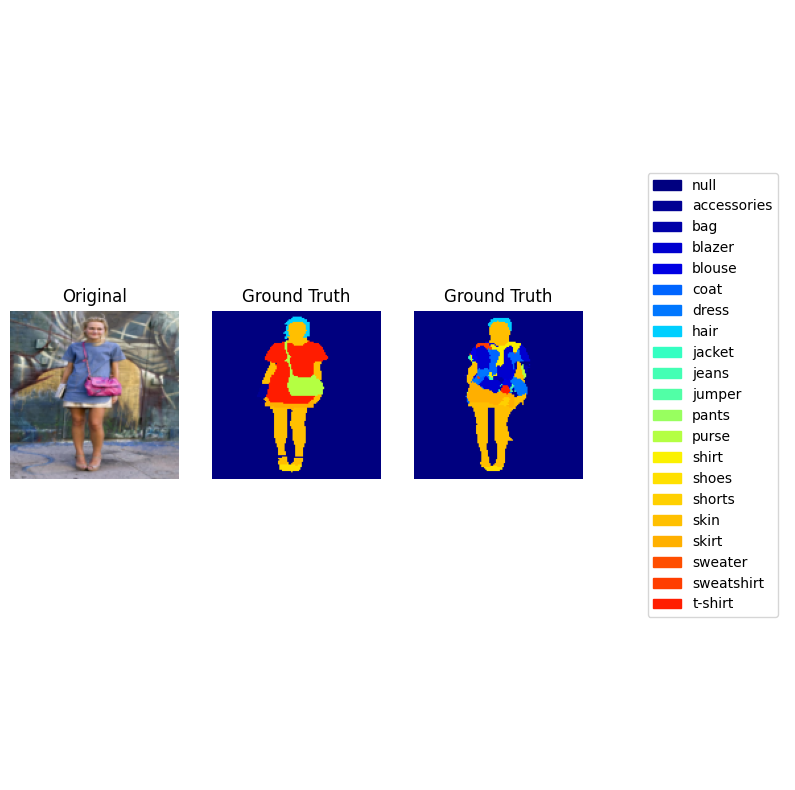

In [36]:
def calculate_iou(pred_mask, gt_mask):
    intersection = np.logical_and(pred_mask, gt_mask)
    union = np.logical_or(pred_mask, gt_mask)
    iou = np.sum(intersection) / np.sum(union) #交集 / 聯集
    return iou

ious = []
for ori_label, pre_pred in zip(ori_groundtrue, pre_groundtrue):
    iou = calculate_iou(pre_pred, ori_label)
    ious.append(iou)
    
average_iou = np.mean(ious)
max_iou_idx = np.argmax(ious)
min_iou_idx = np.argmin(ious)
closest_iou_idx = np.abs(ious - average_iou).argmin() #最靠近average_iou的idx
print("Max IoU:", ious[max_iou_idx])
show_pixel_anno(ori_img[max_iou_idx], display_mask(ori_groundtrue[max_iou_idx]), display_mask(pre_groundtrue[max_iou_idx]))
print("Min IoU:", ious[min_iou_idx])
show_pixel_anno(ori_img[min_iou_idx], display_mask(ori_groundtrue[min_iou_idx]), display_mask(pre_groundtrue[min_iou_idx]))
print("Average IoU:", average_iou)
show_pixel_anno(ori_img[closest_iou_idx], display_mask(ori_groundtrue[closest_iou_idx]), \
                display_mask(pre_groundtrue[closest_iou_idx])) #取最接近平均